# A, B compartment data (pie plot) (A, B, inconsistent, others)

In [1]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [2]:
1-0.618

0.382

In [3]:
def stack_percentage_bar(results, cmap_name, horizontal=False, annotate='number'):
    import sys
    """\
    results : pandas.DataFrame
        results.index is the name of each sample.
        results.columns is the label of each category
        horizontal: bool
        If the figure should be horizontal.
    """

    percentage = results.div(results.sum(axis=1), axis=0) * 100
    percentage_cum = percentage.cumsum(axis=1)
    percentage_cum.loc[:, percentage_cum.shape[1] - 1] = 100.0
    category_colors = plt.get_cmap(cmap_name)(np.linspace(0.15, 0.85, results.shape[1]))
    if horizontal:
        fig, ax = plt.subplots(figsize=(6.4 * .75, 4.8 * .75))
        ax.invert_yaxis()
        ax.set_xlim(0, 100)
        for i, (category_name,
                color) in enumerate(zip(results.columns, category_colors)):
            widths = percentage.iloc[:, i]
            starts = percentage_cum.iloc[:, i] - widths
            ax.barh(results.index,
                    widths,
                    left=starts,
                    height=0.618,
                    label=category_name,
                    color=color)
            xcenters = starts + widths / 2
            r, g, b, _ = color
            text_color = 'white' if r * g * b < 0.33 else (
                'grey' if r * g * b < 0.66 else 'black')
            if annotate == 'number':
                text = [f'{x:d}' for x in results.iloc[:, i]]
            elif annotate == 'percentage':
                text = [f'{x/100:.2%}' for x in percentage.iloc[:, i]]
            else:
                sys.stdout.write(
                    f'Invalide annotate input: {annotate}. Use default parameters number.'
                )
                text = [f'{x:d}' for x in results.iloc[:, i]]
            for y, (x, c) in enumerate(zip(xcenters, text)):
                ax.text(x, y, c, ha='center', va='center', color=text_color)
        ax.set_xticks(np.arange(0, 120, 20))
        ax.set_xticklabels(np.arange(0, 120, 20))
        ax.set_xlabel('Percentage')
        ax.set_yticks(np.arange(percentage.shape[0]))
        ax.set_yticklabels(percentage.index)
        ax.set_ylabel('Sample')
        ax.legend(ncol=results.shape[1],
                  bbox_to_anchor=(0, 1),
                  loc='lower left',
                  fontsize='small')
    else:
        fig, ax = plt.subplots(figsize=(4.8 * .75, 6.4 * .75))
        ax.set_ylim(0, 100)
        for i, (category_name,
                color) in enumerate(zip(results.columns, category_colors)):
            hights = percentage.iloc[:, i]
            starts = percentage_cum.iloc[:, i] - hights
            ax.bar(results.index,
                   hights,
                   bottom=starts,
                   width=0.618,
                   label=category_name,
                   color=color)
            xcenters = starts + hights / 2
            r, g, b, _ = color
            text_color = 'white' if r * g * b < 0.33 else (
                'grey' if r * g * b < 0.66 else 'black')
            if annotate == 'number':
                text = [f'{x:d}' for x in results.iloc[:, i]]
            elif annotate == 'percentage':
                text = [f'{x/100:.2%}' for x in percentage.iloc[:, i]]
            else:
                sys.stdout.write(
                    f'Invalide annotate input: {annotate}. Use default parameters number.'
                )
                text = [f'{x:d}' for x in results.iloc[:, i]]
            for x, (c, y) in enumerate(zip(text, xcenters)):
                ax.text(x, y, c, ha='center', va='center', color=text_color)
        ax.set_xticks(np.arange(results.shape[0]))
        ax.set_xticklabels(percentage.index, rotation=45, ha='right')
        ax.set_xlabel('Sample')
        ax.set_yticks(np.arange(0, 120, 20))
        ax.set_yticklabels(np.arange(0, 120, 20))
        ax.set_ylabel('Percentage')
        ax.legend(bbox_to_anchor=(1, 0), loc='lower left')
    return fig, ax
     

In [4]:
from colour import Color
from matplotlib.colors import LinearSegmentedColormap
def make_Ramp( ramp_colors ): 
    color_ramp = LinearSegmentedColormap.from_list( 'my_list', [ Color( c1 ).rgb for c1 in ramp_colors ] )
    plt.figure( figsize = (15,3))
    plt.imshow( [list(np.arange(0, len( ramp_colors ) , 0.1)) ] , interpolation='nearest', origin='lower', cmap= color_ramp )
    plt.xticks([])
    plt.yticks([])
    return color_ramp
     

In [5]:
stage_dict = {
    'EarlyEmbryogenesis': ['2cell','8cell','Morula','ICM',],
    'PGCsDevelopment':    ['E10.5','E13.5_female','E13.5_male',],
    'Spermatogenesis':    ['US','DS','PS','RS',],
    'RetinalDevelopment': ['E14.5','E17.5','P0','P3','P7','P10','P14','P21',],
    'HeartDevelopment':   ['E10.5','E11.5','E12.5','E13.5','E14.5','E15.5','E16.5','P0',],
    'LiverDevelopment':   ['E11.5','E12.5','E13.5','E14.5','E15.5','E16.5','P0']
}

# Cavalli -- Cell 2017 (A/B compartment)

In [6]:
os.chdir('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/ChromatinStates/Cavalli_Cell2017_ABcompartment_5tissue/')
AB_comp_bed_dict = {}
for cell_type in ['ES', 'NPC', 'CN', 'ncx NPC', 'ncx CN'] :
    AB_comp_bed_dict[cell_type] = pd.read_excel('Cavalli_Cell2017_mESC_NPC_CN.xlsx', header = 0, sheet_name = cell_type)
    # AB_comp_bed_dict[cell_type].to_csv(f'AB_compartment_{"".join(cell_type.split(" "))}_Cavalli_Cell2017.bed', sep = "\t", header = False, index = False)


/mnt/Storage/home/wangyiman/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## length distribution

In [7]:
for cell_type in ['ES', 'NPC', 'CN', 'ncx NPC', 'ncx CN'] :
    AB_comp_bed_dict[cell_type]['length'] = AB_comp_bed_dict[cell_type]['end'] - AB_comp_bed_dict[cell_type]['start']
    
AB_comp_bed_dict[cell_type]

,chrom,start,end,Compartment,length
0,chr1,0,6170000,B,6170000
1,chr1,6187000,7328000,B,1141000
2,chr1,7411000,9442000,B,2031000
3,chr1,9561000,10200000,B,639000
4,chr1,10295000,12810000,B,2515000
...,...,...,...,...,...
2302,chrX,162947000,164439000,B,1492000
2303,chrX,164537000,166056000,B,1519000
2304,chrX,166184000,167205000,A,1021000
2305,chrX,167300000,171031299,B,3731299


## universal & process-specific CHM intersect A/B compartment pie plot

In [17]:
%%bash
cd ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/ChromatinStates/Cavalli_Cell2017_ABcompartment_5tissue/CHM_intersect_table
for cell_type in ES NPC CN ncxNPC ncxCN;do
    bedtools complement -g /mnt/Storage/home/yanghui/annotations/mm10/mm10_main.chrom.sizes -i ../AB_compartment_${cell_type}_Cavalli_Cell2017.bed > ../others_compartment_${cell_type}_Cavalli_Cell2017.bed
done

In [15]:
%%bash
### A,B compartment

cd ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/ChromatinStates/Cavalli_Cell2017_ABcompartment_5tissue/CHM_intersect_table
### universal
for compart in A B;do
    # for process in Universal Universal_complementarySet;do
    for process in Universal_complementarySet;do
        bedtools intersect -c -a ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/${process}.CHM.bed -b <(grep $compart ../AB_compartment_ES_Cavalli_Cell2017.bed) | \
            bedtools intersect -c -a - -b <(grep $compart ../AB_compartment_NPC_Cavalli_Cell2017.bed) | \
            bedtools intersect -c -a - -b <(grep $compart ../AB_compartment_CN_Cavalli_Cell2017.bed) | \
            bedtools intersect -c -a - -b <(grep $compart ../AB_compartment_ncxNPC_Cavalli_Cell2017.bed) | \
            bedtools intersect -c -a - -b <(grep $compart ../AB_compartment_ncxCN_Cavalli_Cell2017.bed) | sort -k1,1 -k2,2n > ${process}CHM_5tissue_${compart}.bed
    done
done

### non-CHM
for compart in A B;do
    bedtools intersect -c -a ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Sequence/NonCHMsCpGrich.bed -b <(grep $compart ../AB_compartment_ES_Cavalli_Cell2017.bed) | \
        bedtools intersect -c -a - -b <(grep $compart ../AB_compartment_NPC_Cavalli_Cell2017.bed) | \
        bedtools intersect -c -a - -b <(grep $compart ../AB_compartment_CN_Cavalli_Cell2017.bed) | \
        bedtools intersect -c -a - -b <(grep $compart ../AB_compartment_ncxNPC_Cavalli_Cell2017.bed) | \
        bedtools intersect -c -a - -b <(grep $compart ../AB_compartment_ncxCN_Cavalli_Cell2017.bed) | sort -k1,1 -k2,2n > NonCHMsCpGrich_5tissue_${compart}.bed
done


### process specific
# for compart in A B;do
#     for process in EarlyEmbryogenesis PGCsDevelopment Spermatogenesis RetinalDevelopment HeartDevelopment LiverDevelopment;do
#         for Type in complementarySet_otherCommon complementarySet;do
#             bedtools intersect -c -a ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Overlap/${process}_${Type}.CHM.bed -b <(grep $compart ../AB_compartment_ES_Cavalli_Cell2017.bed) | \
#                 bedtools intersect -c -a - -b <(grep $compart ../AB_compartment_NPC_Cavalli_Cell2017.bed) | \
#                 bedtools intersect -c -a - -b <(grep $compart ../AB_compartment_CN_Cavalli_Cell2017.bed) | \
#                 bedtools intersect -c -a - -b <(grep $compart ../AB_compartment_ncxNPC_Cavalli_Cell2017.bed) | \
#                 bedtools intersect -c -a - -b <(grep $compart ../AB_compartment_ncxCN_Cavalli_Cell2017.bed) | sort -k1,1 -k2,2n > ${process}_${Type}CHM_5tissue_${compart}.bed
#         done
#     done
# done


In [16]:
%%bash
### others
cd ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/ChromatinStates/Cavalli_Cell2017_ABcompartment_5tissue/CHM_intersect_table
### universal 
# for process in Universal Universal_complementarySet;do
for process in Universal_complementarySet;do
    bedtools intersect -c -a ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/${process}.CHM.bed -b ../others_compartment_ES_Cavalli_Cell2017.bed | \
        bedtools intersect -c -a - -b ../others_compartment_NPC_Cavalli_Cell2017.bed | \
        bedtools intersect -c -a - -b ../others_compartment_CN_Cavalli_Cell2017.bed | \
        bedtools intersect -c -a - -b ../others_compartment_ncxNPC_Cavalli_Cell2017.bed | \
        bedtools intersect -c -a - -b ../others_compartment_ncxCN_Cavalli_Cell2017.bed | sort -k1,1 -k2,2n > ${process}CHM_5tissue_others.bed
done

### non-CHM
bedtools intersect -c -a ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Sequence/NonCHMsCpGrich.bed -b ../others_compartment_ES_Cavalli_Cell2017.bed | \
    bedtools intersect -c -a - -b ../others_compartment_NPC_Cavalli_Cell2017.bed | \
    bedtools intersect -c -a - -b ../others_compartment_CN_Cavalli_Cell2017.bed | \
    bedtools intersect -c -a - -b ../others_compartment_ncxNPC_Cavalli_Cell2017.bed | \
    bedtools intersect -c -a - -b ../others_compartment_ncxCN_Cavalli_Cell2017.bed | sort -k1,1 -k2,2n > NonCHMsCpGrich_5tissue_others.bed
    

### process specific
# for process in EarlyEmbryogenesis PGCsDevelopment Spermatogenesis RetinalDevelopment HeartDevelopment LiverDevelopment;do
#     for Type in complementarySet_otherCommon complementarySet;do
#         bedtools intersect -c -a ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Overlap/${process}_${Type}.CHM.bed -b ../others_compartment_ES_Cavalli_Cell2017.bed | \
#             bedtools intersect -c -a - -b ../others_compartment_NPC_Cavalli_Cell2017.bed | \
#             bedtools intersect -c -a - -b ../others_compartment_CN_Cavalli_Cell2017.bed | \
#             bedtools intersect -c -a - -b ../others_compartment_ncxNPC_Cavalli_Cell2017.bed | \
#             bedtools intersect -c -a - -b ../others_compartment_ncxCN_Cavalli_Cell2017.bed | sort -k1,1 -k2,2n > ${process}_${Type}CHM_5tissue_others.bed
#     done
# done

In [9]:
os.chdir("/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/ChromatinStates/Cavalli_Cell2017_ABcompartment_5tissue/CHM_intersect_table")
intsct_df_binary_dict = {}
for process in ['Universal', 'Universal_complementarySet', 'NonCHMsCpGrich', 
                'EarlyEmbryogenesis_complementarySet', 'EarlyEmbryogenesis_complementarySet_otherCommon',
                'PGCsDevelopment_complementarySet', 'PGCsDevelopment_complementarySet_otherCommon',
                'Spermatogenesis_complementarySet', 'Spermatogenesis_complementarySet_otherCommon',
                'RetinalDevelopment_complementarySet', 'RetinalDevelopment_complementarySet_otherCommon',
                'HeartDevelopment_complementarySet', 'HeartDevelopment_complementarySet_otherCommon',
                'LiverDevelopment_complementarySet', 'LiverDevelopment_complementarySet_otherCommon',
                ] :
    intsct_df_binary = pd.DataFrame()
    ### A : 4, B : 2, other : 1
    process_l = f'{process}CHM' if process != 'NonCHMsCpGrich' else process
    for i,compart in enumerate(['A', 'B', 'others']) :
        df = pd.read_csv(
            f'{process_l}_5tissue_{compart}.bed',
            sep = "\t",
            header = None,
            usecols = [3,4,5,6,7]
                        )
        if i == 0 :
            intsct_df_binary = df * (2 ** (2-i))
        else :
            intsct_df_binary = intsct_df_binary + df * (2 ** (2-i))

    intsct_df_binary_dict[process] = intsct_df_binary

intsct_df_binary_dict['Universal']

,3,4,5,6,7
0,4,2,2,2,2
1,4,2,2,2,2
2,2,2,2,2,2
3,2,2,2,2,2
4,2,2,2,2,2
...,...,...,...,...,...
2672,4,4,4,4,4
2673,4,4,4,4,4
2674,4,4,4,4,4
2675,4,4,4,4,4


In [10]:
intsct_df_binary_dict['Universal'][(intsct_df_binary_dict['Universal'] == 7).sum(1) > 0]

,3,4,5,6,7


In [13]:
### 3 : BO, 5 : AO, 6 : AB (boundary)
print(intsct_df_binary_dict['Universal'][((intsct_df_binary_dict['Universal'] == 3) | (intsct_df_binary_dict['Universal'] == 5) | (intsct_df_binary_dict['Universal'] == 6)).sum(axis = 1) > 0].shape)

(53, 5)


In [14]:
### pure A, B, other
print(intsct_df_binary_dict['Universal'][(intsct_df_binary_dict['Universal'] == 4).sum(axis = 1) == 5].shape,
      intsct_df_binary_dict['Universal'][(intsct_df_binary_dict['Universal'] == 2).sum(axis = 1) == 5].shape,
      intsct_df_binary_dict['Universal'][(intsct_df_binary_dict['Universal'] == 1).sum(axis = 1) == 5].shape)

(553, 5) (946, 5) (261, 5)


In [15]:
553 + 946 + 261 + 53

1813

In [16]:
### inconsistent
def inconsistent_condition(row) :
    flag = True
    for x in row :
        if x in [3,5,6] :
            flag = False
            
    if len(row.unique()) == 1 :
        flag = False
            
    return flag
    
intsct_df_binary_dict['Universal'][intsct_df_binary_dict['Universal'].apply(inconsistent_condition, axis = 1)].shape

(864, 5)

In [74]:
864 + 1813

2677

In [11]:
### generate size table for pie plot

### inconsistent function
def inconsistent_condition(row) :
    flag = True
    for x in row :
        if x in [3,5,6] :
            flag = False
            
    if len(row.unique()) == 1 :
        flag = False
            
    return flag

### A, B, boundary, inconsistent, others
def size_table_cal(intsct_df_binary) :
    size_table = {}
    size_table['A'] = intsct_df_binary[(intsct_df_binary == 4).sum(axis = 1) == 5].shape[0]
    size_table['B'] = intsct_df_binary[(intsct_df_binary == 2).sum(axis = 1) == 5].shape[0]
    size_table['boundary'] = intsct_df_binary[((intsct_df_binary == 3) | (intsct_df_binary == 5) | (intsct_df_binary == 6)).sum(axis = 1) > 0].shape[0]
    size_table['inconsistent'] = intsct_df_binary[intsct_df_binary.apply(inconsistent_condition, axis = 1)].shape[0]
    size_table['others'] = intsct_df_binary[(intsct_df_binary == 1).sum(axis = 1) == 5].shape[0]
    
    return size_table

size_table_dict = {}
for process in ['Universal', 'Universal_complementarySet', 'NonCHMsCpGrich',
                'EarlyEmbryogenesis_complementarySet', 'EarlyEmbryogenesis_complementarySet_otherCommon',
                'PGCsDevelopment_complementarySet', 'PGCsDevelopment_complementarySet_otherCommon',
                'Spermatogenesis_complementarySet', 'Spermatogenesis_complementarySet_otherCommon',
                'RetinalDevelopment_complementarySet', 'RetinalDevelopment_complementarySet_otherCommon',
                'HeartDevelopment_complementarySet', 'HeartDevelopment_complementarySet_otherCommon',
                'LiverDevelopment_complementarySet', 'LiverDevelopment_complementarySet_otherCommon',
                ] :
    size_table_dict[process] = size_table_cal(intsct_df_binary_dict[process])
    
size_table_df = pd.DataFrame.from_dict(size_table_dict).T
size_table_df

,A,B,boundary,inconsistent,others
Universal,553,946,53,864,261
Universal_complementarySet,4075,6029,136,5748,1648
NonCHMsCpGrich,12351,639,0,6590,2489
EarlyEmbryogenesis_complementarySet,2831,3561,88,3330,958
EarlyEmbryogenesis_complementarySet_otherCommon,317,376,5,481,127
PGCsDevelopment_complementarySet,3497,5045,114,4747,1340
PGCsDevelopment_complementarySet_otherCommon,36,51,0,64,22
Spermatogenesis_complementarySet,2802,1573,55,2276,661
Spermatogenesis_complementarySet_otherCommon,219,947,19,613,214
RetinalDevelopment_complementarySet,835,2456,44,1877,668


In [40]:
691 + 268 + 557 + 955

2471

In [28]:
size_table_df.T

,Universal,EarlyEmbryoSpecific,PGCSpecific,SpermSpecific,RetinalSpecific,HeartSpecific,LiverSpecific
A,553,316,34,219,1678,28,20
B,946,373,50,947,389,162,10
boundary,53,5,0,19,21,5,1
inconsistent,864,479,61,610,837,69,30
others,261,125,22,211,196,50,13


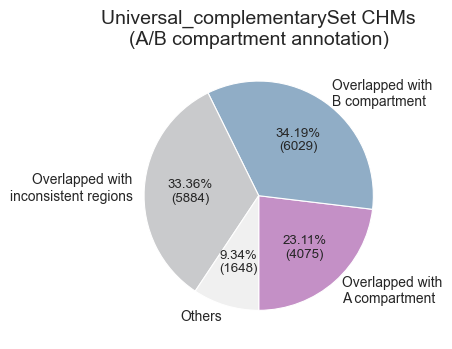

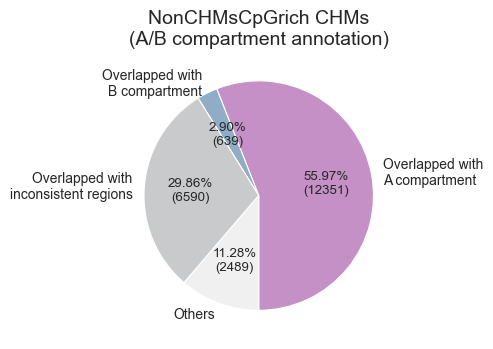

In [12]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.2f}%\n({:d})".format(pct, absolute)

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    for process in [
                # 'Universal', 
                'Universal_complementarySet', 'NonCHMsCpGrich',
                # 'EarlyEmbryogenesis_complementarySet', 'EarlyEmbryogenesis_complementarySet_otherCommon',
                # 'PGCsDevelopment_complementarySet', 'PGCsDevelopment_complementarySet_otherCommon',
                # 'Spermatogenesis_complementarySet', 'Spermatogenesis_complementarySet_otherCommon',
                # 'RetinalDevelopment_complementarySet', 'RetinalDevelopment_complementarySet_otherCommon',
                # 'HeartDevelopment_complementarySet', 'HeartDevelopment_complementarySet_otherCommon',
                # 'LiverDevelopment_complementarySet', 'LiverDevelopment_complementarySet_otherCommon',
                ] :
        fig, ax = plt.subplots(figsize = (6.4 * .75, 4.8 * .75), tight_layout = True)
    
        sizes_5 = size_table_df.T[process].tolist()
        sizes_4 = [sizes_5[0], sizes_5[1], sizes_5[2] + sizes_5[3], sizes_5[4]]
        # sizes = [553, 946, 53 + 864, 261]
        ax.pie(sizes_4, 
            explode = [0, 0, 0, 0],
            labels = ['Overlapped with\nA compartment', 
                        'Overlapped with\nB compartment', 
    #                      'Overlapped with\nboundaries',
                        'Overlapped with\ninconsistent regions',
                        'Others',
                        ],
            autopct=lambda pct: func(pct, sizes_4),
            shadow = False, 
            startangle = -90,
            colors = ['#C490C6', '#90ADC6', '#C9CACC', '#F0F0F0', ]
            )
            
            
        ax.set_title(f'{process} CHMs\n(A/B compartment annotation)')

        fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make13_pie_{process}CHM_ABcompart_intersect_5tissue.pdf', transparent = True)


In [92]:
946 + 553 + 917 + 261

2677

In [95]:
intsct_df_binary[(intsct_df_binary == 4).sum(axis = 1) == 5].index

(Int64Index([  38,   40,   41,   42,   63,   65,   66,   67,   68,   69,
             ...
             2666, 2667, 2668, 2670, 2671, 2672, 2673, 2674, 2675, 2676],
            dtype='int64', length=553),)

In [96]:
intsct_df_binary[(intsct_df_binary == 2).sum(axis = 1) == 5].index

Int64Index([   2,    3,    4,    6,    8,    9,   10,   11,   12,   13,
            ...
            2587, 2588, 2589, 2605, 2606, 2609, 2610, 2629, 2630, 2660],
           dtype='int64', length=946)

In [4]:
os.chdir('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/ChromatinStates/Cavalli_Cell2017_ABcompartment_5tissue/CHM_intersect_table')
for process in [
                # 'Universal', 
                'Universal_complementarySet',
                'EarlyEmbryogenesis_complementarySet', 'EarlyEmbryogenesis_complementarySet_otherCommon',
                'PGCsDevelopment_complementarySet', 'PGCsDevelopment_complementarySet_otherCommon',
                'Spermatogenesis_complementarySet', 'Spermatogenesis_complementarySet_otherCommon',
                'RetinalDevelopment_complementarySet', 'RetinalDevelopment_complementarySet_otherCommon',
                'HeartDevelopment_complementarySet', 'HeartDevelopment_complementarySet_otherCommon',
                'LiverDevelopment_complementarySet', 'LiverDevelopment_complementarySet_otherCommon',
                ] :
    CHM = pd.read_csv(
        f'{process}CHM_5tissue_A.bed',
        sep = "\t", header = None
    )

    ### A
    CHM.loc[CHM.reset_index()['index'].isin(intsct_df_binary_dict[process][(intsct_df_binary_dict[process] == 4).sum(axis = 1) == 5].index)].to_csv(
        f'intersectOnly_{process}CHM_5tissue_A.bed', sep = "\t", header = False, index = False
    )

    ### B
    CHM.loc[CHM.reset_index()['index'].isin(intsct_df_binary_dict[process][(intsct_df_binary_dict[process] == 2).sum(axis = 1) == 5].index)].to_csv(
        f'intersectOnly_{process}CHM_5tissue_B.bed', sep = "\t", header = False, index = False
        
    )


In [5]:
%%bash
cd ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/ChromatinStates/Cavalli_Cell2017_ABcompartment_5tissue/CHM_intersect_table
# for process in Universal Universal_complementarySet EarlyEmbryogenesis_complementarySet EarlyEmbryogenesis_complementarySet_otherCommon PGCsDevelopment_complementarySet PGCsDevelopment_complementarySet_otherCommon Spermatogenesis_complementarySet Spermatogenesis_complementarySet_otherCommon RetinalDevelopment_complementarySet RetinalDevelopment_complementarySet_otherCommon HeartDevelopment_complementarySet HeartDevelopment_complementarySet_otherCommon LiverDevelopment_complementarySet LiverDevelopment_complementarySet_otherCommon;do
for process in Universal Universal_complementarySet;do
    for compart in A B;do
        awk 'BEGIN{FS=OFS="\t"} {print $1,$2-1,$2}' intersectOnly_${process}CHM_5tissue_${compart}.bed > intersectOnly_${process}CHM_5tissue_${compart}.5end.bed
        awk 'BEGIN{FS=OFS="\t"} {print $1,$3,$3+1}' intersectOnly_${process}CHM_5tissue_${compart}.bed > intersectOnly_${process}CHM_5tissue_${compart}.3end.bed
    done
done

In [2]:
%%bash
cd ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/ChromatinStates/Cavalli_Cell2017_ABcompartment_5tissue/nonCHM_intersect_table
for process in nonCHM;do
    for compart in A B;do
        awk 'BEGIN{FS=OFS="\t"} {print $1,$2-1,$2}' intersectOnly_${process}_5tissue_${compart}.bed > intersectOnly_${process}_5tissue_${compart}.5end.bed
        awk 'BEGIN{FS=OFS="\t"} {print $1,$3,$3+1}' intersectOnly_${process}_5tissue_${compart}.bed > intersectOnly_${process}_5tissue_${compart}.3end.bed
    done
done